In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [5]:
import sympy
print(sympy.__version__)

0.7.6.1


In [61]:
Re, Rm, omega0, B0, pi, Q, beta, c1, c2, rho, nu, eta, u0, du0, q = symbols("R_e R_m Omega_0 B_0 pi Q beta c_1 c_2 rho nu eta u0 du0 q", real=True)
psi, u, A, B = symbols("psi u A B")
u, v, w, Br, Bphi, Bz, p = symbols("u v w B_r B_phi B_z p")
dt, dr, dz = symbols("d_t d_r d_z")
kr, kz, kx = symbols("k_r k_z k_x") 
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

In [7]:
(1j*kz)**3

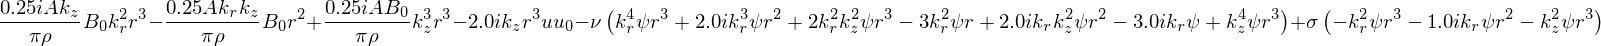

In [8]:
sigma*(-r**3*kz**2*psi - r**3*kr**2*psi - 1j*r**2*kr*psi) - r**2*2*r*u0*1j*kz*u + r**3*(1/(4*pi*rho))*B0*1j*kz**3*A - (1.0/(4*pi*rho))*B0*r**2*kz*kr*A + (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2*A - nu*(2*r**2*kz**2*1j*kr*psi + 2*r**3*kz**2*kr**2*psi + r**3*kz**4*psi + r**3*kr**4*psi - 3*1j*kr*psi - 3*r*kr**2*psi + 2*r**2*1j*kr**3*psi)

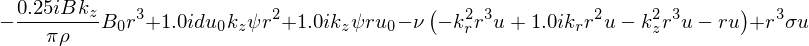

In [9]:
sigma*r**3*u + 1j*kz*r*u0*psi + 1j*kz*r*r*du0*psi - 1j*kz*r**3*(1/(4*pi*rho))*B0*B - nu*(-r**3*kz**2*u - r**3*kr**2*u + r**2*1j*kr*u - r*u)

In [10]:
sigma*r*A - r*B0*1j*kz*psi - eta*(-r*kr**2*A - r*kz**2*A - 1j*kr*A)

In [11]:
sigma*r**3*B + r*u0*1j*kz*A - r**3*B0*1j*kz*u - 1j*kz*r*r*du0*A - eta*(-r**3*kz**2*B - r**3*kr**2*B + r**2*1j*kr*B - r*B)

In [12]:
LM = Matrix([[sigma*(-r**3*kz**2 - r**3*kr**2 - 1j*r**2*kr) - nu*(2*r**2*kz**2*1j*kr + 2*r**3*kz**2*kr**2 + r**3*kz**4 + r**3*kr**4 - 3*1j*kr - 3*r*kr**2 + 2*r**2*1j*kr**3), -r**2*2*r*u0*1j*kz, r**3*(1/(4*pi*rho))*B0*1j*kz**3 - (1.0/(4*pi*rho))*B0*r**2*kz*kr + (1.0/(4*pi*rho))*r**3*B0*1j*kz*kr**2, 0],
             [1j*kz*r*u0 + 1j*kz*r*r*du0, sigma*r**3 - nu*(-r**3*kz**2 - r**3*kr**2 + r**2*1j*kr - r), 0, - 1j*kz*r**3*(1/(4*pi*rho))*B0],
             [-r*B0*1j*kz, 0, sigma*r - eta*(-r*kr**2 - r*kz**2 - 1j*kr), 0],
             [0, -r**3*B0*1j*kz, r*u0*1j*kz - 1j*kz*r*r*du0, sigma*r**3 - eta*(-r**3*kz**2 - r**3*kr**2 + r**2*1j*kr - r)]])

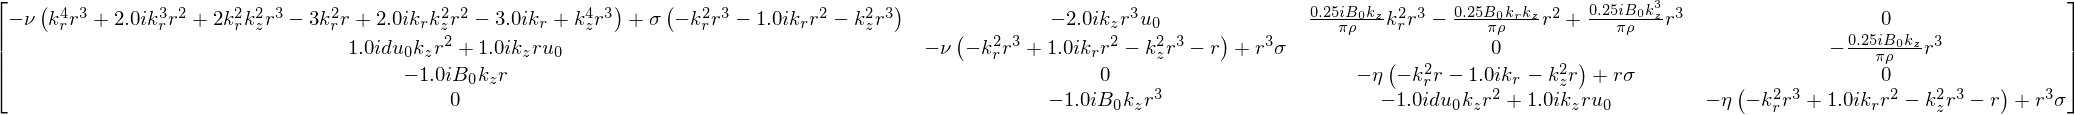

In [13]:
LM

$u_0 = c1 r + B/r$

$\partial_r u_0 = c1 - c2/r^2$

In [14]:
LM = LM.subs(u0, (r*c1 + c2/r))
LM = LM.subs(du0, (c1 - c2/r**2))

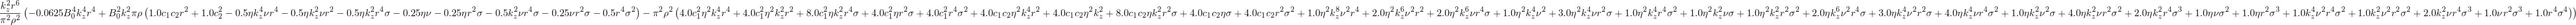

In [15]:
((LM.subs(kr, 0)).det()).simplify()

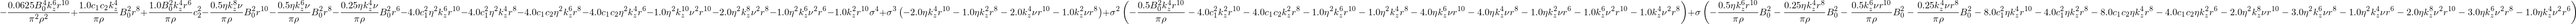

In [16]:
collect((LM.subs(kr, 0)).det(), sigma)

In [17]:
disp = LM.det()

KeyboardInterrupt: 

In [ ]:
func = lambdify((kr, nu, eta, r, rho, pi, B0, c1, c2), disp)

nu = 3.26e-3 $cm^2/s$

eta = 2000 $cm^2/s$

rho = 6 $g/cm^3$

B0 = 3000 G

In [27]:
r_in = 5. # cm
r_out = 3*r_in
h = 10. # cm
d = r_out - r_in
eps = h/d
K = np.pi/h * np.sqrt(1+eps**2)
Omega_in = 314 # rad/s
Omega_out = 37.9 # rad/s
nugj = 3.26e-3 # cm^2/s
etagj = 2000
rhogj = 6
B0gj = 3000
Re_in = Omega_in/(nugj*K**2)
Re_out = Omega_out/(nugj*K**2)

c2gj = (Omega_out - Omega_in)/(1/r_out**2 - 1/r_in**2)
c1gj = Omega_in - c2gj/r_in**2

#goodmanjiparams = func(0, 3.26E-3, 2000, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [ ]:
goodmanjiparams = func(0, 3.26E-3, 2000, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz = lambdify(kz, goodmanjiparams)

In [ ]:
print(goodmanjiparams)
print(goodmanjibykz(0.314))

In [ ]:
c2gj

In [ ]:
vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out1 = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz(vertical_wavenumbers[i]))
    #print(hh1)
    out1[i, 0] = hh1[0]
    out1[i, 1] = hh1[1]
    out1[i, 2] = hh1[2]
    out1[i, 3] = hh1[3]

In [ ]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out1[:, 0].real)
ax.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out1[:, 0].imag)
ax.plot(vertical_wavenumbers, out1[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

plt.suptitle("Goodman & Ji parameters", size = 20)

In [ ]:
plt.figure()
plt.plot(vertical_wavenumbers, out1[:, 0].real)
plt.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
plt.plot(vertical_wavenumbers, out1[:, 2].real, ':')
plt.plot(vertical_wavenumbers, out1[:, 3].real, '.')
plt.ylim(-200, 100)
plt.xlim(0.0, 1.5)
plt.plot(vertical_wavenumbers, np.zeros(len(vertical_wavenumbers)), color = "black")
plt.plot(np.ones(len(vertical_wavenumbers))*np.pi/10, np.linspace(-500, 200, len(vertical_wavenumbers)), color = "gray", lw = 2)
plt.suptitle("Goodman & Ji parameters", size = 20)

In [ ]:
fig = plt.figure(figsize = (8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(out1[:, 0].real, out1[:, 0].imag, '.')
ax1.plot(out1[:, 1].real, out1[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

ax2.plot(out1[:, 2].real, out1[:, 2].imag, '.', color = "red")
ax2.plot(out1[:, 3].real, out1[:, 3].imag, '.', color = "teal")
ax2.set_ylabel("Im(k)")
ax2.set_xlabel("Re(k)")

plt.suptitle("Goodman & Ji parameters", size = 20)

What does this look like in the ideal MHD approximation?

In [ ]:
goodmanjiparams_ideal = func(0, 0, 0, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz_ideal = lambdify(kz, goodmanjiparams_ideal)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_ideal = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_ideal(vertical_wavenumbers[i]))
    out_ideal[i, 0] = hh1[0]
    out_ideal[i, 1] = hh1[1]
    out_ideal[i, 2] = hh1[2]
    out_ideal[i, 3] = hh1[3]

In [ ]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_ideal[:, 0].real)
ax.plot(vertical_wavenumbers, out_ideal[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out_ideal[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out_ideal[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_ideal[:, 0].imag)
ax.plot(vertical_wavenumbers, out_ideal[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out_ideal[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out_ideal[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Ideal MHD", size=20)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(out_ideal[:, 0].real, out_ideal[:, 0].imag, '.')
ax1.plot(out_ideal[:, 1].real, out_ideal[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

ax2.plot(out_ideal[:, 2].real, out_ideal[:, 2].imag, '.', color = "red")
ax2.plot(out_ideal[:, 3].real, out_ideal[:, 3].imag, '.', color = "teal")
ax2.set_ylabel("Im(k)")
ax2.set_xlabel("Re(k)")

plt.suptitle("Ideal MHD", size = 20)

In [ ]:
# eta for Rm = 1
eta_Rm1 = np.sqrt(Omega_in*Omega_out)/K**2
nu_Pm1 = eta_Rm1
print(eta)

goodmanjiparams_Pm1 = func(0, nu_Pm1, eta_Rm1, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz_Pm1 = lambdify(kz, goodmanjiparams_Pm1)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_Pm1 = np.zeros((len(vertical_wavenumbers), 2), np.complex) # two roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_Pm1(vertical_wavenumbers[i]))
    out_Pm1[i, 0] = hh1[0]
    out_Pm1[i, 1] = hh1[1]
    #out_Pm1[i, 2] = hh1[2]
    #out_Pm1[i, 3] = hh1[3]

In [ ]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_Pm1[:, 0].real)
ax.plot(vertical_wavenumbers, out_Pm1[:, 1].real, '-.')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 2].real, ':')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_Pm1[:, 0].imag)
ax.plot(vertical_wavenumbers, out_Pm1[:, 1].imag, '-.')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 2].imag, ':')
#ax.plot(vertical_wavenumbers, out_Pm1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

plt.suptitle("Pm = Rm = 1", size = 20)

Note that the Pm = Rm = 1 case only has two roots to the dispersion equation (degenerate modes?)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
ax1.plot(out_Pm1[:, 0].real, out_Pm1[:, 0].imag, '.')
ax1.plot(out_Pm1[:, 1].real, out_Pm1[:, 1].imag, '.')
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")

plt.suptitle("Pm = Rm = 1", size = 20)

In [ ]:
# Inviscid limit, nu -> 0. We'll keep Rm = 1.
eta_Rm1 = np.sqrt(Omega_in*Omega_out)/K**2

print(eta)

goodmanjiparams_inviscid = func(0, 0, eta_Pm1, 10.0, 6, np.pi, 3000, c1gj, c2gj)
goodmanjibykz_inviscid = lambdify(kz, goodmanjiparams_inviscid)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_inviscid = np.zeros((len(vertical_wavenumbers), 4), np.complex) # two roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_inviscid(vertical_wavenumbers[i]))
    if i == 0:
        print("there are {} modes for kz = {}".format(len(hh1), vertical_wavenumbers[i]))
    out_inviscid[i, 0] = hh1[0]
    out_inviscid[i, 1] = hh1[1]
    
    # There sometimes appear to be only two modes. Degeneracy??
    if len(hh1) > 2:
        out_inviscid[i, 2] = hh1[2]
        out_inviscid[i, 3] = hh1[3]
    else:
        out_inviscid[i, 2] = None
        out_inviscid[i, 3] = None

In [ ]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_inviscid[:, 0].real)
ax.plot(vertical_wavenumbers, out_inviscid[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out_inviscid[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out_inviscid[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_inviscid[:, 0].imag)
ax.plot(vertical_wavenumbers, out_inviscid[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out_inviscid[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out_inviscid[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Inviscid Limit", size=20)

Let's compare the above to the primitive variable dispersion relation.

The state vector is $[u, v, w, B_r, B_\phi, B_z, p]^T$

In [ ]:
r**2*sigma*u - nu*r**2*(-kz**2*u + 1j*kz*1j*kr*w)  + r**2*1j*kr*p/rho - 2*r*u0*v - r**2*B0*1j*kz*Br/(4*pi*rho)
r**2*sigma*v - nu*(-r**2*kr**2*v + r*1j*kr*v - r**2*kz**2*v - v) + r*u0*u + u*r*r*du0 - r**2*B0*1j*kz*Bphi/(4*pi*rho) 
r*sigma*w - nu*(-r*kr**2*w + 1j*kr*w - r*kz**2*w) + 1j*r*kz*p/rho - r*B0*1j*kz*Bz/(4*pi*rho) 
r*1j*kr*u + u + r*1j*kz*w
sigma*(Br) - eta*(-kz**2*Br - 1j*kz*1j*kr*(Bz)) - B0*1j*kz*u
r**2*sigma*(Bphi) - eta*(-r**2*kr**2*Bphi - r**2*kz**2*Bphi + r*1j*kr*Bphi - Bphi) - Br*r*r*du0 + r*u0*Br - r**2*B0*1j*kz*v 
r*1j*kr*Br + Br + r*1j*kz*Bz 


In [ ]:
L_primitive = Matrix([[r**2*sigma - nu*r**2*(-kz**2), - 2*r*u0, - nu*r**2*(1j*kz*1j*kr), -r**2*B0*1j*kz/(4*pi*rho), 0, 0, r**2*1j*kr/rho],
            [r*u0 + r*r*du0, r**2*sigma - nu*(-r**2*kr**2 + r*1j*kr - r**2*kz**2 - 1), 0, 0, -r**2*B0*1j*kz/(4*pi*rho), 0, 0],
            [0, 0, r*sigma - nu*(-r*kr**2 + 1j*kr - r*kz**2), 0, 0, - r*B0*1j*kz/(4*pi*rho), 1j*r*kz/rho],
            [r*1j*kr + 1, 0, r*1j*kz, 0, 0, 0, 0],
            [-B0*1j*kz, 0, 0, sigma - eta*(-kz**2), 0, -eta*(-1j*kz*1j*kr), 0],
            [0, -r**2*B0*1j*kz, 0, -r*r*du0 + r*u0, r**2*sigma - eta*(-r**2*kr**2 - r**2*kz**2 + r*1j*kr - 1), 0, 0],
            [0, 0, 0, r*1j*kr + 1, 0, r*1j*kz, 0]])
L_primitive

In [ ]:
disp_primitive = (L_primitive.subs(kr, 0)).det()

In [ ]:
(disp.subs(kr, 0)).collect(sigma)

In [ ]:
disp_primitive.collect(sigma)

In [ ]:
disp_primitive = disp_primitive.subs(u0, (r*c1 + c2/r))
disp_primitive = disp_primitive.subs(du0, (c1 - c2/r**2))

simplify((disp.subs(kr, 0))/disp_primitive).collect(sigma)

So the primitive and streamfunction-derived dispersion relations are the same to within a scalar. Seems like there's nothing to worry about there. 

Now let's look at the thin-gap dispersion relation.

In [18]:
-sigma*kx**2*psi - kz**2*sigma*psi - nu*kx**4*psi + -2*nu*kz**2*kx**2*psi - nu*kz**4*psi - 2*1j*kz*u + (1/(4*pi*rho))*1j*kz*kx**2*A + (1/(4*pi*rho))*kz**3*1j*A 
sigma*u + nu*kx**2*u + nu*kz**2*u - (q - 2)*1j*kz*psi - (1/(4*pi*rho))*1j*kz*B 
sigma*A + eta*kx**2*A + eta*kz**2*A - 1j*kz*psi 
sigma*B + eta*kx**2*B + eta*kz**2*B - 1j*kz*u + q*1j*kz*A 
        

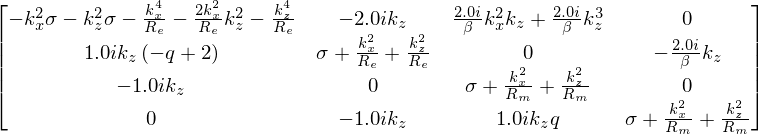

In [62]:
# non primitive variables
#-sigma*kx**2*psi - kz**2*sigma*psi - iR*kx**4*psi + -2*iR*kz**2*kx**2*psi - iR*kz**4*psi - 2*1j*kz*u + (2/beta)*1j*kz*kx**2*A + (2/beta)*kz**3*1j*A 
#sigma*u + iR*kx**2*u + iR*kz**2*u - (q - 2)*1j*kz*psi - (2/beta)*1j*kz*B 
#sigma*A + iRm*kx**2*A + iRm*kz**2*A - 1j*kz*psi 
#sigma*B + iRm*kx**2*B + iRm*kz**2*B - 1j*kz*u + q*1j*kz*A 

L_thin_nondim = Matrix([[-sigma*kx**2 - kz**2*sigma - (1/Re)*kx**4 + -2*(1/Re)*kz**2*kx**2 - (1/Re)*kz**4, -2*1j*kz, (2/beta)*1j*kz*kx**2 + (2/beta)*kz**3*1j, 0],
                 [-(q - 2)*1j*kz, sigma + (1/Re)*kx**2 + (1/Re)*kz**2, 0, -(2/beta)*1j*kz],
                 [-1j*kz, 0, sigma + (1/Rm)*kx**2 + (1/Rm)*kz**2, 0],
                 [0, -1j*kz, q*1j*kz, sigma + (1/Rm)*kx**2 + (1/Rm)*kz**2]])

L_thin_nondim

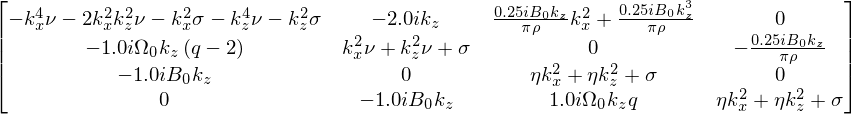

In [63]:
L_thin = Matrix([[-sigma*kx**2 - kz**2*sigma - nu*kx**4 + -2*nu*kz**2*kx**2 - nu*kz**4, -2*1j*kz, B0*(1/(4*pi*rho))*1j*kz*kx**2 + B0*(1/(4*pi*rho))*kz**3*1j, 0],
                 [-omega0*(q - 2)*1j*kz, sigma + nu*kx**2 + nu*kz**2, 0, -B0*(1/(4*pi*rho))*1j*kz],
                 [-B0*1j*kz, 0, sigma + eta*kx**2 + eta*kz**2, 0],
                 [0, -B0*1j*kz, omega0*q*1j*kz, sigma + eta*kx**2 + eta*kz**2]])
L_thin

In [64]:
disp_thin = L_thin.det()

In [65]:
disp_thin_nondim = L_thin_nondim.det()

In [66]:
#disp_thin.collect(sigma)

In [67]:
#((disp_thin/disp).simplify()).collect(sigma)

In [68]:
func_thin = lambdify((kx, nu, eta, rho, pi, B0, q, omega0), disp_thin)

In [69]:
func_thin_nondim = lambdify((kz, Re, Rm, beta, q, pi), disp_thin_nondim)

In [70]:
zeta_bar = 2*(r_out**2 * Omega_out - r_in**2 * Omega_in)/((r_out**2 - r_in**2)*np.sqrt(Omega_in*Omega_out))
q_gj = 2 - zeta_bar
Omega0_gj = c1gj + c2gj/10. #Omega = c1 + c2/r**2

print("q = {}, Omega0 = {}".format(q_gj, Omega0_gj))

goodmanjiparams_thingap = func_thin(0, nugj, etagj, rhogj, np.pi, B0gj, q_gj, Omega0_gj)

q = 1.93789524247, Omega0 = 779.91875


In [72]:
Qfid = 0.748
Rmfid = 4.879
Pmfid = 0.001
Refid = Rmfid/Pmfid
qfid = 1.5
betafid = 25.0

nondimparams = func_thin_nondim(Qfid, Refid, Rmfid, betafid, qfid, np.pi)

In [99]:
solve_thingap = lambdify(kx, nondimparams)

radial_wavenumbers = np.arange(0.00, 2, 0.05)
out_thingap = np.zeros((len(radial_wavenumbers), 4), np.complex) # four roots
for i in range(len(radial_wavenumbers)):
    hh1 = solve(solve_thingap(radial_wavenumbers[i]))
    if i == 0:
        print("there are {} modes for kr = {}".format(len(hh1), radial_wavenumbers[i]))
    out_thingap[i, 0] = hh1[0]
    out_thingap[i, 1] = hh1[1]
    
    # There sometimes appear to be only two modes. Degeneracy??
    if len(hh1) > 2:
        out_thingap[i, 2] = hh1[2]
        out_thingap[i, 3] = hh1[3]
    else:
        print("only two modes!")
        out_thingap[i, 2] = None
        out_thingap[i, 3] = None

there are 4 modes for kr = 0.0


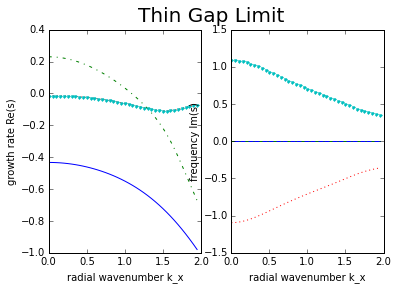

In [100]:
plt.figure()
ax = plt.subplot(121)
ax.plot(radial_wavenumbers, out_thingap[:, 0].real)
ax.plot(radial_wavenumbers, out_thingap[:, 1].real, '-.')
ax.plot(radial_wavenumbers, out_thingap[:, 2].real, ':')
ax.plot(radial_wavenumbers, out_thingap[:, 3].real, '.')
#ax.set_ylim(-1000, 200)

ax.set_xlabel('radial wavenumber k_x')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(radial_wavenumbers, out_thingap[:, 0].imag)
ax.plot(radial_wavenumbers, out_thingap[:, 1].imag, '-.')
ax.plot(radial_wavenumbers, out_thingap[:, 2].imag, ':')
ax.plot(radial_wavenumbers, out_thingap[:, 3].imag, '.')

ax.set_xlabel('radial wavenumber k_x')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Thin Gap Limit", size=20)

0.230101856598
(array([0]),)
(0.230101856598+0j)


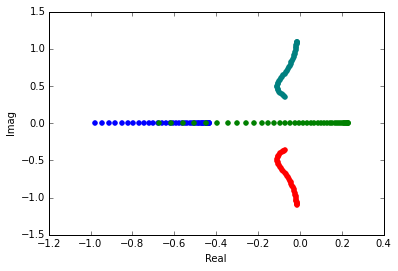

In [107]:
plt.scatter(out_thingap[:, 0].real, out_thingap[:, 0].imag, color="blue")
plt.scatter(out_thingap[:, 1].real, out_thingap[:, 1].imag, color="green")
plt.scatter(out_thingap[:, 2].real, out_thingap[:, 2].imag, color="red")
plt.scatter(out_thingap[:, 3].real, out_thingap[:, 3].imag, color="teal")
plt.xlabel('Real')
plt.ylabel('Imag')
print(np.max(out_thingap.real))
print(np.where(np.max(out_thingap[:, 1].real)))
radial_wavenumbers[0]
print(out_thingap[0, 1])

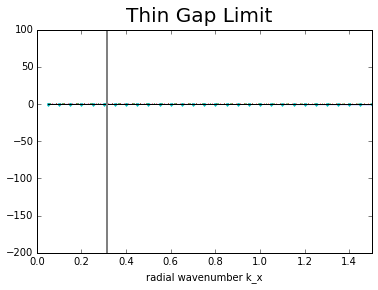

In [80]:
plt.figure()
plt.plot(radial_wavenumbers, out_thingap[:, 0].real)
plt.plot(radial_wavenumbers, out_thingap[:, 1].real, '-.')
plt.plot(radial_wavenumbers, out_thingap[:, 2].real, ':')
plt.plot(radial_wavenumbers, out_thingap[:, 3].real, '.')
plt.ylim(-200, 100)
plt.xlim(0.0, 1.5)
plt.plot(vertical_wavenumbers, np.zeros(len(vertical_wavenumbers)), color = "black")
plt.plot(np.ones(len(vertical_wavenumbers))*np.pi/10, np.linspace(-500, 200, len(vertical_wavenumbers)), color = "gray", lw = 2)
plt.suptitle("Thin Gap Limit", size = 20)
plt.xlabel('radial wavenumber k_x')

In [36]:
"""
goodmanjibykz_thingap = lambdify(kz, goodmanjiparams_thingap)

vertical_wavenumbers = np.arange(0.05, 2, 0.05)
out_thingap = np.zeros((len(vertical_wavenumbers), 4), np.complex) # four roots
for i in range(len(vertical_wavenumbers)):
    hh1 = solve(goodmanjibykz_thingap(vertical_wavenumbers[i]))
    if i == 0:
        print("there are {} modes for kz = {}".format(len(hh1), vertical_wavenumbers[i]))
    out_thingap[i, 0] = hh1[0]
    out_thingap[i, 1] = hh1[1]
    
    # There sometimes appear to be only two modes. Degeneracy??
    if len(hh1) > 2:
        out_thingap[i, 2] = hh1[2]
        out_thingap[i, 3] = hh1[3]
    else:
        print("only two modes!")
        out_thingap[i, 2] = None
        out_thingap[i, 3] = None
"""

there are 4 modes for kz = 0.05


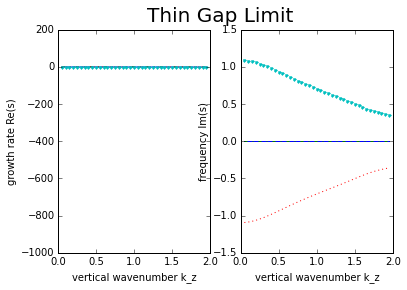

In [74]:
plt.figure()
ax = plt.subplot(121)
ax.plot(vertical_wavenumbers, out_thingap[:, 0].real)
ax.plot(vertical_wavenumbers, out_thingap[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out_thingap[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out_thingap[:, 3].real, '.')
ax.set_ylim(-1000, 200)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(122)
ax.plot(vertical_wavenumbers, out_thingap[:, 0].imag)
ax.plot(vertical_wavenumbers, out_thingap[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out_thingap[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out_thingap[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')
plt.suptitle("Thin Gap Limit", size=20)

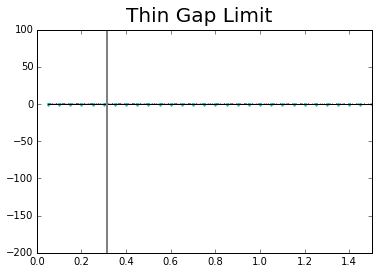

In [75]:
plt.figure()
plt.plot(vertical_wavenumbers, out_thingap[:, 0].real)
plt.plot(vertical_wavenumbers, out_thingap[:, 1].real, '-.')
plt.plot(vertical_wavenumbers, out_thingap[:, 2].real, ':')
plt.plot(vertical_wavenumbers, out_thingap[:, 3].real, '.')
plt.ylim(-200, 100)
plt.xlim(0.0, 1.5)
plt.plot(vertical_wavenumbers, np.zeros(len(vertical_wavenumbers)), color = "black")
plt.plot(np.ones(len(vertical_wavenumbers))*np.pi/10, np.linspace(-500, 200, len(vertical_wavenumbers)), color = "gray", lw = 2)
plt.suptitle("Thin Gap Limit", size = 20)

NameError: name 'out1' is not defined

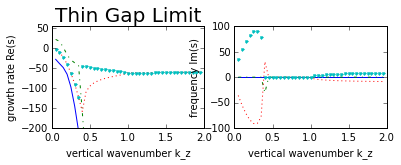

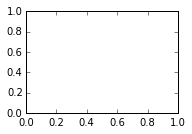

In [32]:
plt.figure()
ax = plt.subplot(221)
ax.plot(vertical_wavenumbers, out_thingap[:, 0].real)
ax.plot(vertical_wavenumbers, out_thingap[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out_thingap[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out_thingap[:, 3].real, '.')
ax.set_ylim(-200, 55)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')
ax.set_title("Thin Gap Limit", size = 20)

ax = plt.subplot(222)
ax.plot(vertical_wavenumbers, out_thingap[:, 0].imag)
ax.plot(vertical_wavenumbers, out_thingap[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out_thingap[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out_thingap[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')

plt.figure()
ax = plt.subplot(223)
ax.plot(vertical_wavenumbers, out1[:, 0].real)
ax.plot(vertical_wavenumbers, out1[:, 1].real, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].real, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].real, '.')
ax.set_ylim(-200, 55)
ax.set_title("Wide Gap", size=20)

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('growth rate Re(s)')

ax = plt.subplot(224)
ax.plot(vertical_wavenumbers, out1[:, 0].imag)
ax.plot(vertical_wavenumbers, out1[:, 1].imag, '-.')
ax.plot(vertical_wavenumbers, out1[:, 2].imag, ':')
ax.plot(vertical_wavenumbers, out1[:, 3].imag, '.')

ax.set_xlabel('vertical wavenumber k_z')
ax.set_ylabel('frequency Im(s)')


In [ ]:
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(out1[:, 0].real, out1[:, 0].imag, '.')
ax1.plot(out1[:, 1].real, out1[:, 1].imag, '.')
#ax1.plot(np.zeros(len(out_thingap[:, 0])), np.linspace(np.nanmin(out1[:, 1]), np.nanmax(out1[:, 1]), len(out_thingap[:, 0])), '--', color="gray")
ax1.set_ylabel("Im(k)")
ax1.set_xlabel("Re(k)")
ax1.set_title("Wide gap")

ax2.plot(out1[:, 2].real, out1[:, 2].imag, '.', color = "red")
ax2.plot(out1[:, 3].real, out1[:, 3].imag, '.', color = "teal")
ax2.set_ylabel("Im(k)")
ax2.set_xlabel("Re(k)")
ax2.set_title("Wide gap")

ax3.plot(out_thingap[:, 0].real, out_thingap[:, 0].imag, '.')
ax3.plot(out_thingap[:, 1].real, out_thingap[:, 1].imag, '.')
ax3.set_ylabel("Im(k)")
ax3.set_xlabel("Re(k)")
ax3.set_title("Thin gap")
ax3.set_ylim(-35, 5)
ax3.plot(np.zeros(len(out_thingap[:, 0])), np.linspace(-35, 5, len(out_thingap[:, 0])), '--', color="gray")

ax4.plot(out_thingap[:, 2].real, out_thingap[:, 2].imag, '.', color = "red")
ax4.plot(out_thingap[:, 3].real, out_thingap[:, 3].imag, '.', color = "teal")
ax4.set_ylabel("Im(k)")
ax4.set_xlabel("Re(k)")
ax4.set_title("Thin gap")

plt.suptitle("Goodman & Ji parameters", size = 20)

thingap_maxgrowthrate_indx = np.nanargmax(out_thingap[:, 1].real)
widegap_maxgrowthrate_indx = np.nanargmax(out1[:, 1].real)
print("Max thin gap growth rate is {} for kz = {}, wide gap is {} for kz = {}".format(out_thingap[thingap_maxgrowthrate_indx, 1].real, vertical_wavenumbers[thingap_maxgrowthrate_indx], out1[widegap_maxgrowthrate_indx, 1].real, vertical_wavenumbers[widegap_maxgrowthrate_indx]))


These look pretty similar, although it appears we haven't gotten down to the critical vertical wavenumber for the thin gap verion, since its fastest real-mode growth rate is for the smallest sampled $k_z$.

Now let's investigate the critical k_z as a function of both $\nu$ and $\eta$ simultaneously

In [ ]:
func_nu_eta = lambdify((kr, sigma, r, rho, pi, B0, c1, c2), disp)

In [ ]:
goodmanjiparams_criticalkz = func_nu_eta(0, 0, 10.0, 6, np.pi, 3000, c1gj, c2gj)

In [ ]:
%%time
#nu = 3.26e-3  cm2/scm2/s 
#eta = 2000  cm2/scm2/s
nu_sweep = np.arange(3.0E-3, 3.5E-3, 0.05E-3)
eta_sweep = np.arange(1500, 2500, 100)
print(len(nu_sweep), len(eta_sweep))

goodmanjibykz = lambdify((nu, eta), goodmanjiparams_criticalkz)
print solve(goodmanjibykz(3.26e-3, 2000))

In [ ]:
%%time

nu_eta_space = np.zeros((len(nu_sweep), len(eta_sweep), 7), np.complex)
for i in range(len(nu_sweep)):
    for j in range(len(eta_sweep)):
        hh1 = solve(goodmanjibykz(nu_sweep[i], eta_sweep[j]))
        nu_eta_space[i, j, 0] = hh1[0]
        nu_eta_space[i, j, 1] = hh1[1]
        nu_eta_space[i, j, 2] = hh1[2]
        nu_eta_space[i, j, 3] = hh1[3]
        nu_eta_space[i, j, 4] = hh1[4]
        nu_eta_space[i, j, 5] = hh1[5]
        nu_eta_space[i, j, 6] = hh1[6]
        print("nu, eta", i, j)
        